In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np

### Question a)

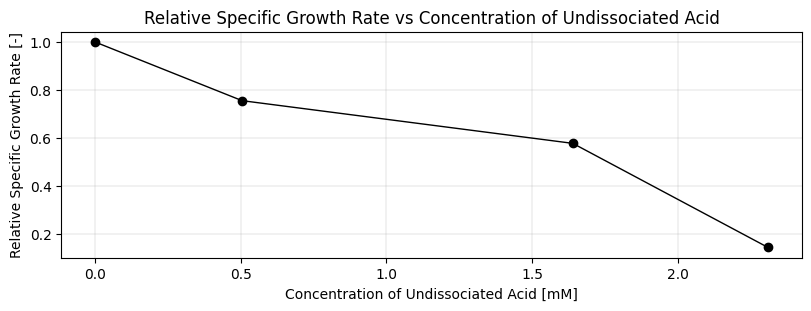

In [2]:
# Set parameters
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black', 'red', 'blue'])
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

# Data
P = [0.0, 0.505, 1.64, 2.31]  # Concentration of undissociated acid (P) [mM]
mu = [0.9, 0.68, 0.52, 0.13]   # Specific growth rate [1/h]

# Calculate the relative specific growth rate for each measurement
mu_relative = [mu_i / mu[0] for mu_i in mu]

# Plot
plt.plot(P, mu_relative, marker='o', linestyle='-')
plt.xlabel('Concentration of Undissociated Acid [mM]')
plt.ylabel('Relative Specific Growth Rate [-]')
plt.title('Relative Specific Growth Rate vs Concentration of Undissociated Acid')
plt.grid(True, linewidth=0.25, linestyle='-')
plt.show()

### Question b)

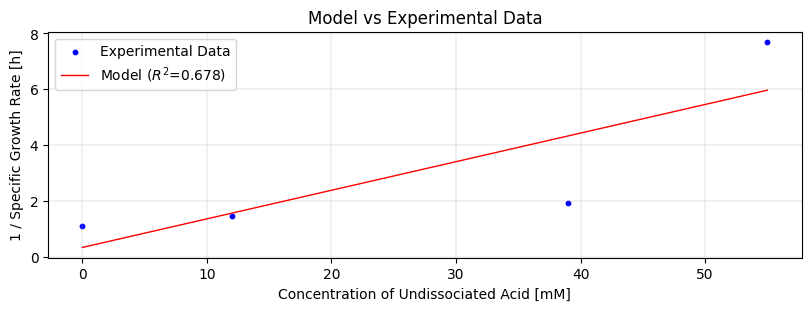

Inhibition Constant K_I: 10.9 mM


In [3]:
# Experimental data
P = np.array([0.0, 12.0, 39.0, 55.0])  # Concentration of undissociated acid (mM)
mu = np.array([0.9, 0.68, 0.52, 0.13])  # Specific growth rate (1/h)

# Calculate 1/mu
inv_mu = 1 / mu

# Perform linear fitting
slope, intercept = np.polyfit(P, inv_mu, 1)

# Calculate inhibition constant K_I
K_I = 1 / (slope * mu.max())

# Calculate R-squared
residuals = inv_mu - (slope * P + intercept)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((inv_mu - np.mean(inv_mu))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Generate model predictions
model_inv_mu = slope * P + intercept

# Plot the experimental data points and model
plt.scatter(P, inv_mu, label='Experimental Data', marker='o', color='blue', s=10.0)
plt.plot(P, model_inv_mu, label=f'Model ($R^2$={r_squared:.3f})', color='red', linestyle='-')
plt.xlabel('Concentration of Undissociated Acid [mM]')
plt.ylabel('1 / Specific Growth Rate [h]')
plt.title('Model vs Experimental Data')
plt.legend()

# Style
plt.grid(True, linewidth=0.25, linestyle='-')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

plt.show()

# Print the obtained value for the inhibition constant K_I
print(f"Inhibition Constant K_I: {K_I:.1f} mM")

### Question c)

In [4]:
# Experimental data
P = np.array([0.0, 12.0, 39.0, 55.0])  # Concentration of undissociated acid (mM)
mu = np.array([0.9, 0.68, 0.52, 0.13])  # Specific growth rate (1/h)

# Perform linear regression
slope, intercept = np.polyfit(P, mu, 1)

# Calculate the parameter Pmax
Pmax = -mu.max() / slope

# Print the second model's parameter, i.e. Pmax
print(f"The second model's parameter, Pmax, is determined to be: {Pmax:.1f} mM")

The second model's parameter, Pmax, is determined to be: 72.0 mM


### Question c)

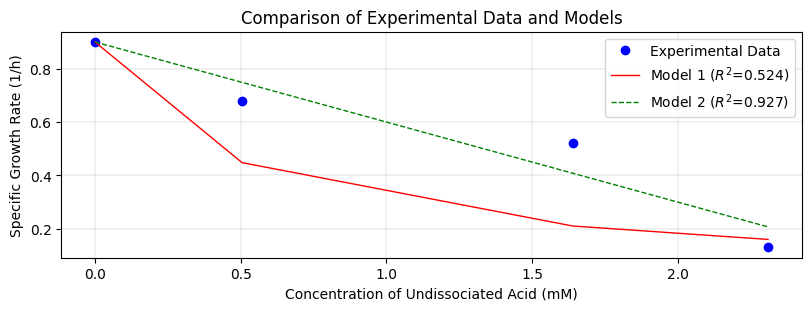

In [5]:
# Experimental data
P_exp = np.array([0.0, 0.505, 1.64, 2.31])  # Concentration of undissociated acid (mM)
mu_exp = np.array([0.9, 0.68, 0.52, 0.13])  # Specific growth rate (1/h)

# Model parameters
mu_max = 0.9  # Maximum specific growth rate (1/h)
K_I = 0.5  # Inhibition constant (mM)
Pmax = 3.0  # Maximum concentration of undissociated acid (mM)

# Calculate model predictions
mu_model1 = mu_max * (1 / (1 + P_exp / K_I))  # First inhibition model
mu_model2 = mu_max * (1 - P_exp / Pmax)  # Second inhibition model

# Calculate R-squared for each model
def calculate_r_squared(y_true, y_pred):
    ss_residuals = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_residuals / ss_total)
    return r_squared

r_squared_model1 = calculate_r_squared(mu_exp, mu_model1)
r_squared_model2 = calculate_r_squared(mu_exp, mu_model2)

# Set line width
plt.rcParams['lines.linewidth'] = 1.0

# Set color scheme
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue', 'red', 'green'])

# Plot the experimental data and models
plt.plot(P_exp, mu_exp, 'o', label='Experimental Data')
plt.plot(P_exp, mu_model1, label=f'Model 1 ($R^2$={r_squared_model1:.3f})')
plt.plot(P_exp, mu_model2, '--', label=f'Model 2 ($R^2$={r_squared_model2:.3f})')

# Style
plt.xlabel('Concentration of Undissociated Acid (mM)')
plt.ylabel('Specific Growth Rate (1/h)')
plt.title('Comparison of Experimental Data and Models')
plt.legend()
plt.grid(True, linewidth=0.25, linestyle='-')
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

# Show the plot
plt.show()

### Question d)

For lactic acid concentration t0 = 1 g/L, growth stops at pH = 0.00
For lactic acid concentration t0 = 10 g/L, growth stops at pH = 3.68


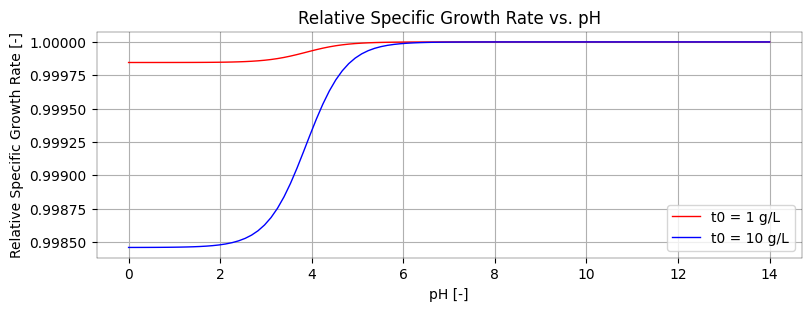

In [6]:
# Given constants
pKa = 3.88  # pKa value for lactic acid
M = 90.08  # Molar mass of lactic acid (g/mol)
mu_max = 0.9  # Maximum specific growth rate (1/h)
Pmax = 72.0  # Maximum concentration of undissociated acid (mM)

# Function to calculate concentration of undissociated acid (P) for given pH and initial concentration (t0)
def calculate_P(pH, t0):
    return t0 * (1 - 10**(pH - pKa) / (1 + 10**(pH - pKa))) / M

# Function to calculate specific growth rate (mu) for given pH and lactic acid concentration (t0)
def calculate_mu(pH, t0):
    P = calculate_P(pH, t0)
    return mu_max * (1 - P / Pmax)  # Applying substrate saturation assumption

# Function to calculate relative specific growth rate for given specific growth rate and reference growth rate at P=0
def calculate_relative_mu(mu, mu_0):
    return mu / mu_0

# pH values to consider within a biological system
pH_values = np.linspace(0, 14, 100)

# Initial concentrations of lactic acid (total concentration)
t0_values = [1, 10]  # g/L

# Calculate specific growth rate at P = 0 (mu_0)
mu_0 = calculate_mu(0, 0)

# Set graphical parameters
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 0.25
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 10})

# Define colors
colors = ['red', 'blue']

# Find pH at which growth stops for each lactic acid concentration
for t0, color in zip(t0_values, colors):
    # Calculate specific growth rate for each pH value
    mu_values = [calculate_mu(pH, t0) for pH in pH_values]
    
    # Calculate relative specific growth rate
    relative_mu_values = [calculate_relative_mu(mu, mu_0) for mu in mu_values]
    
    # Find the index where the relative specific growth rate stabilizes
    plateau_index = np.where(np.isclose(relative_mu_values, relative_mu_values[-1], atol=1e-3))[0][0]
    
    # Get the corresponding pH value
    plateau_pH = pH_values[plateau_index]
    
    # Determine if growth might or might not stop within the considered pH range
    if plateau_index == len(pH_values) - 1:
        print(f"For lactic acid concentration t0 = {t0} g/L, growth might not stop within the considered pH range because it doesn't reach a critical threshold to inhibit growth effectively.")
    else:
        print(f"For lactic acid concentration t0 = {t0} g/L, growth stops at pH = {plateau_pH:.2f}")
    
    # Plot results
    plt.plot(pH_values, relative_mu_values, label=f"t0 = {t0} g/L", linestyle='-', color=color)

# Add labels and legend
plt.xlabel('pH [-]')
plt.ylabel('Relative Specific Growth Rate [-]')
plt.title('Relative Specific Growth Rate vs. pH')
plt.legend()

# Show plot
plt.show()
